# Google Trend API Using:

#### https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f

In [1]:
!pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.7.2-py3-none-any.whl size=14261 sha256=a5b107fe71fb526d00916fbceeda8644fd9bdc172bb580399317ecd61c57d007
  Stored in directory: /Users/michaellink/Library/Caches/pip/wheels/58/87/76/aae69ce81a925e574db418628ebbe184387c1e67320697511c
Successfully built pytrends


In [2]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

In [4]:
pytrend.build_payload(kw_list=['Taylor Swift'])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,Taylor Swift
geoName,
Afghanistan,0
Albania,0
Algeria,15
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


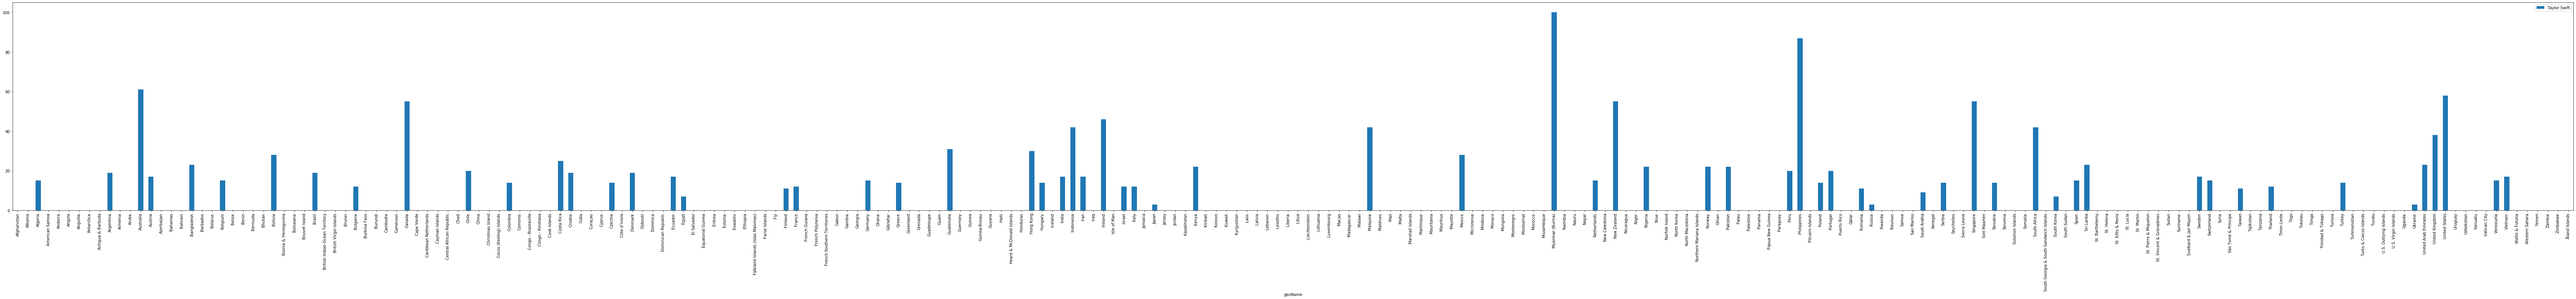

In [8]:
df.reset_index().plot(x='geoName', y='Taylor Swift', figsize=(120, 10), kind ='bar')

In [9]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='united_states')
df.head()

,0
0,Katie Miller
1,Michael Flynn
2,6ix9ine
3,Dead to Me
4,Happy Mother's Day


In [12]:
df = pytrend.today_searches(pn='US')
df.head()

0          Katie Miller
1         Michael Flynn
2               6ix9ine
3            Dead to Me
4    Happy Mother's Day
Name: query, dtype: object

In [18]:
# Get Google Top Charts
df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,India vs South Africa,
1,Cameron Boyce,
2,Copa America,
3,Bangladesh vs India,
4,iPhone 11,


In [19]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='Mercedes Benz')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Mercedes-Benz,Automobile company
1,Mercedes-Benz A-Class,Mid-size car
2,Mercedes-Benz E-Class,Luxury vehicle
3,Mercedes-Benz GLB-Class,SUV
4,Mercedes-Benz S-Class,Luxury vehicle


In [20]:
pytrend.build_payload(kw_list=['Coronavirus'])

In [23]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
print(related_queries.values())

dict_values([{'top':                             query  value
0              coronavirus update    100
1                          corona     71
2               coronavirus cases     71
3                news coronavirus     68
4   thank you coronavirus helpers     53
5            coronavirus symptoms     53
6                coronavirus tips     50
7                  coronavirus uk     48
8               coronavirus india     45
9                 coronavirus map     38
10                   corona virus     35
11                coronavirus usa     33
12              china coronavirus     29
13             italia coronavirus     28
14               coronavirus live     28
15             coronavirus france     28
16                 coronavirus us     27
17               live coronavirus     27
18              coronavirus world     27
19              world coronavirus     27
20             españa coronavirus     26
21              coronavirus italy     23
22                          italy   

In [24]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':      value formattedValue                                            link  \
0   109850       Breakout  /trends/explore?q=/g/11ckxx4f1g&date=today+5-y   
1    59600       Breakout      /trends/explore?q=/m/018xnw&date=today+5-y   
2    52000       Breakout       /trends/explore?q=/m/09kvv&date=today+5-y   
3    48750       Breakout    /trends/explore?q=/g/1tfkwsf1&date=today+5-y   
4    33300       Breakout       /trends/explore?q=/m/069q9&date=today+5-y   
5    30900       Breakout       /trends/explore?q=/m/0l3cy&date=today+5-y   
6    25300       Breakout    /trends/explore?q=/g/1235wdfh&date=today+5-y   
7    18750       Breakout       /trends/explore?q=/m/0bzty&date=today+5-y   
8    10050       Breakout       /trends/explore?q=/m/03rjj&date=today+5-y   
9     6050       Breakout      /trends/explore?q=/m/0222qb&date=today+5-y   
10    5700       Breakout     /trends/explore?q=/m/02bjrlw&date=today+5-y   
11    3850        +3,850%       /trends/explore?q=/m

#### Bringing in policy_df

In [35]:
policy_df = pd.read_csv('/Users/michaellink/Desktop/__NYCDSA/_Projects/web_scraping/presidents/How_to_Talk_Like_a_President/_data/policies/policy_names.csv')
policy_df['policy'] = policy_df['policy'].str.lower()
policy_df['policy'] = policy_df['policy'].str.strip()
policy_df['policy_type'] = policy_df['policy_type'].str.lower()

policy_list = policy_df['policy'].to_list()

#### Converting policy names to list and nesting it in fives in anticipation of using google api max of five in list

In [101]:
policy_list = policy_df['policy'].to_list()

In [114]:
policy_list[0:5]

['death penalty', 'drug policy', 'incarcer', 'gun control', 'shooting']

In [80]:
def cinco_nest(L, L_nest = None):
    for i in range(len(L)):
        if i%5 == 0:
            L_nest.append(L[i-5:i])
        elif i == len(L):
            L_nest.append(L[i-(i%5):i])
        else:
            continue
        
    return L_nest[1:]

#### Bringing in needed google stuff

In [93]:
kw_list = list_[0:5]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
pytrends.interest_over_time()

,death penalty,drug policy,incarcer,gun control,shooting,isPartial
date,,,,,,
2004-01-01,5,0,0,2,17,False
2004-02-01,6,1,0,2,17,False
2004-03-01,7,0,0,3,18,False
2004-04-01,6,0,0,3,17,False
2004-05-01,5,1,0,2,17,False
...,...,...,...,...,...,...
2020-01-01,1,0,0,1,24,False
2020-02-01,1,0,0,1,24,False
2020-03-01,1,0,0,1,18,False


In [87]:
nested_policy_list = cinco_nest(L = policy_list, L_nest = []);

In [163]:
# Function borrows from the following documentation:
    # https://pypi.org/project/pytrends/#interest-over-time
def google_trend_csv(list_of_words, csv_path):
    
    # Converting policy names to list and nesting it in fives in anticipation of using google api max of five in list
    def cinco_nest(L, L_nest = None):
        for i in range(len(L)):
            print(i)
            if i%4 == 0 and i != 0:
                L_nest.append(L[i-4:i+1])
                print(i, ': ', L_nest,'/n')
            elif i+1 == len(L):
                if i >=5:
                    L_nest.append(L[i-(i%5):])
                    print(i, ':-- ', L_nest,'/n')
                else:
                    L_nest.append(L[0:])
                    print(i, ': ', L_nest,'/n')
            else:
                continue        
        return L_nest

    # Using function defined above to nest list of words in pairs of five or less
    nested_policy_list = cinco_nest(L = list_of_words, L_nest = []);

    # Importing necessary library and setting location to US
    from pytrends.request import TrendReq
    pytrends = TrendReq(hl='en-US', tz=360)

    # Creating empty dataframe in preparation for google trend pull
    google_trend_df = pd.DataFrame()

    for nest in nested_policy_list:
        # Creating interest over time dataframe using words in the nested list
        kw_list = nest
        pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
        temp = pytrends.interest_over_time()

        # Concatenating the results to dataframe on each iteration
        google_trend_df = pd.concat([google_trend_df, temp], axis=1, sort=False)

    # Dropping non-needed columns    
    try:
        google_trend_df = google_trend_df.drop('isPartial' , axis='columns')
        google_trend_df.to_csv(csv_path)
    except:
        google_trend_df.to_csv(csv_path)

# Exporting to csv


In [167]:
# Function borrows from the following documentation:
    # https://pypi.org/project/pytrends/#interest-over-time
def google_trend_csv(list_of_words, csv_path):
    
    # Importing necessary library and setting location to US
    from pytrends.request import TrendReq
    pytrends = TrendReq(hl='en-US', tz=360)

    # Creating empty dataframe in preparation for google trend pull
    google_trend_df = pd.DataFrame()

    for word in list_of_words:
        # Creating interest over time dataframe using words in the nested list
        kw_list = [word]
        pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
        temp = pytrends.interest_over_time()

        # Concatenating the results to dataframe on each iteration
        google_trend_df = pd.concat([google_trend_df, temp], axis=1, sort=False)

    # Dropping non-needed columns    
    try:
        google_trend_df = google_trend_df.drop('isPartial' , axis='columns')
        google_trend_df.to_csv(csv_path)
    except:
        google_trend_df.to_csv(csv_path)

# Exporting to csv


In [168]:
google_trend_csv(list_of_words = policy_list, csv_path = '/Users/michaellink/Desktop/__NYCDSA/_Projects/web_scraping/presidents/How_to_Talk_Like_a_President/_data/google_trends/data/test_single.csv')

In [132]:
a = ['death penalty', 'drug policy', 'incarcer', 'gun control', 'shooting', 'gun control']
type(a)

list

In [158]:
    def cinco_nest(L, L_nest = None):
        for i in range(len(L)):
            print(i)
            if i%4 == 0 and i != 0:
                L_nest.append(L[i-4:i+1])
                print(i, ': ', L_nest,'/n')
            elif i+1 == len(L):
                if i >=5:
                    L_nest.append(L[i-(i%5):])
                    print(i, ':-- ', L_nest,'/n')
                else:
                    L_nest.append(L[0:])
                    print(i, ': ', L_nest,'/n')
            else:
                continue        
        return L_nest

In [160]:
5 - (5%5)

5

In [161]:
a[5:]

['gun control']

In [162]:
cinco_nest(a[0:3], L_nest=[])

0
1
2
2 :  [['death penalty', 'drug policy', 'incarcer']] /n


[['death penalty', 'drug policy', 'incarcer']]

In [135]:
for i in range(len(a)):
    print(i)

0
1
2
3
4
5


In [136]:
len(a)

6

In [122]:
google_trend_csv(list_of_words = a, csv_path = '/Users/michaellink/Desktop/__NYCDSA/_Projects/web_scraping/presidents/How_to_Talk_Like_a_President/_data/google_trends/data/test3.csv')

In [164]:
google_trend_csv(list_of_words = ['death penalty'], csv_path = '/Users/michaellink/Desktop/__NYCDSA/_Projects/web_scraping/presidents/How_to_Talk_Like_a_President/_data/google_trends/data/test2.csv')

0
0 :  [['death penalty']] /n


In [99]:
google_trend_df.drop('isPartial' , axis='columns')

,death penalty,drug policy,incarcer,gun control,shooting,abortion,pro life,arts,civil rights,racism,...,air quality,global warming,carbon dioxide,climate change,greenhouse,campaign finance reform,privatization,health insurance,medicaid,medicare
date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,5,0,0,2,17,16,1,100,7,6,...,8,23,9,8,24,1,4,89,32,56
2004-02-01,6,0,0,2,17,18,1,96,10,7,...,7,25,10,13,27,1,5,86,29,52
2004-03-01,7,0,0,3,17,19,1,94,9,8,...,7,27,9,9,30,1,6,80,28,57
2004-04-01,6,0,0,3,17,21,1,93,10,8,...,9,24,9,8,28,1,6,83,30,58
2004-05-01,6,1,0,2,17,18,1,90,10,7,...,8,28,8,9,28,0,5,77,30,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,1,0,0,1,23,8,1,29,2,3,...,24,12,8,26,20,0,1,62,46,73
2020-02-01,1,0,0,1,24,8,1,29,3,4,...,8,13,9,24,22,0,1,60,45,75
2020-03-01,1,0,0,1,18,9,1,23,3,3,...,9,10,9,19,29,0,1,52,36,62


In [91]:
google_trend_df = pd.DataFrame()

In [65]:
pytrends.interest_over_time()#.to_csv('/Users/michaellink/Desktop/__NYCDSA/_Projects/web_scraping/presidents/How_to_Talk_Like_a_President/_data/google_trends/data/test.csv')

,death penalty,drug policy,incarcer,gun control,shooting,isPartial
date,,,,,,
2004-01-01,5,0,0,2,17,False
2004-02-01,7,1,0,2,18,False
2004-03-01,7,1,0,2,18,False
2004-04-01,6,1,0,3,17,False
2004-05-01,5,1,0,2,16,False
...,...,...,...,...,...,...
2020-01-01,1,0,0,1,24,False
2020-02-01,1,0,0,1,24,False
2020-03-01,1,0,0,1,18,False


In [51]:
path_str = r'/Users/michaellink/Desktop/__NYCDSA/_Projects/web_scraping/presidents/How_to_Talk_Like_a_President/_data/google_trends/data/'

In [53]:
path_str + list_[0] + '.csv'

'/Users/michaellink/Desktop/__NYCDSA/_Projects/web_scraping/presidents/How_to_Talk_Like_a_President/_data/google_trends/data/death penalty.csv'

In [70]:
print(type(list_[0]))
type([list_[0]])

<class 'str'>


list

In [67]:
kw_list = list_[0:2]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
    
path_csv = path_str + list_[0] + '.csv'
pytrends.interest_over_time().to_csv(path_csv)

In [55]:
path_csv = path_str + list_[0] + '.csv'
type(path_csv)

str

In [74]:
list_

['death penalty',
 'drug policy',
 'incarcer',
 'gun control',
 'shooting',
 'abortion',
 'pro life',
 'arts',
 'civil rights',
 'racism',
 'budget',
 'economy',
 'stock',
 'taxes',
 'recession',
 'debt',
 'budget',
 'education',
 'college',
 'student debt',
 'air quality',
 'global warming',
 'carbon dioxide',
 'climate change',
 'greenhouse',
 'campaign finance reform',
 'privatization',
 'health insurance',
 'medicaid',
 'medicare',
 'social security',
 'welfare',
 'defense spending',
 'war']